# Setup

In [2]:
# Dependencies and Setup
import requests
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import API key
from resources import apikey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (csv)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform (low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform (low = -90.000, high = 90.000, size = 1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)
        
## Print the city count to confirm sufficient count
len(cities)

632

# Data Retrieval

In [4]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval \n-----------------------------")

for city in cities:
    
    params = {"appid": apikey,
             "q": city,
             "units": "imperial"}
    
    request = requests.get(url, params = params)
    data = request.json()
    
    try:
        print(f"Processing Record {cities.index(city)} | {city}")
                        
        city_list.append(data["name"])
        cloud_list.append(data["clouds"]["all"])
        country_list.append(data["sys"]["country"])
        date_list.append(data["dt"])
        humidity_list.append(data["main"]["humidity"])
        lat_list.append(data["coord"]["lat"])
        lng_list.append(data["coord"]["lon"])
        max_temp_list.append(data["main"]["temp_max"])
        wind_speed_list.append(data["wind"]["speed"])
    
    except:
        print("City not found! Skipping...")





Beginning Data Retrieval 
-----------------------------
Processing Record 0 | mar del plata
Processing Record 1 | busselton
Processing Record 2 | ushuaia
Processing Record 3 | taltal
Processing Record 4 | port alfred
Processing Record 5 | port elizabeth
Processing Record 6 | andevoranto
City not found! Skipping...
Processing Record 7 | hopkinsville
Processing Record 8 | nalut
Processing Record 9 | qaanaaq
Processing Record 10 | georgetown
Processing Record 11 | punta arenas
Processing Record 12 | taolanaro
City not found! Skipping...
Processing Record 13 | bredasdorp
Processing Record 14 | san-pedro
Processing Record 15 | umzimvubu
City not found! Skipping...
Processing Record 16 | dubti
Processing Record 17 | hermanus
Processing Record 18 | tessalit
Processing Record 19 | clyde river
Processing Record 20 | olonets
Processing Record 21 | bambous virieux
Processing Record 22 | la baule-escoublac
Processing Record 23 | la asuncion
Processing Record 24 | talnakh
Processing Record 25 | sai

Processing Record 232 | rawson
Processing Record 233 | rulenge
Processing Record 234 | arlit
Processing Record 235 | brewster
Processing Record 236 | dujuma
City not found! Skipping...
Processing Record 237 | kuche
City not found! Skipping...
Processing Record 238 | matay
Processing Record 239 | nebolchi
Processing Record 240 | blagoyevo
Processing Record 241 | nsoko
Processing Record 242 | panapakkam
City not found! Skipping...
Processing Record 243 | rjukan
Processing Record 244 | posse
Processing Record 245 | amot
Processing Record 246 | bud
Processing Record 247 | dalbandin
Processing Record 248 | henties bay
Processing Record 249 | tarko-sale
Processing Record 250 | saint anthony
Processing Record 251 | ndago
Processing Record 252 | faya
Processing Record 253 | goderich
Processing Record 254 | eirunepe
Processing Record 255 | shushtar
Processing Record 256 | thunder bay
Processing Record 257 | kytlym
City not found! Skipping...
Processing Record 258 | kobojango
City not found! Ski

Processing Record 466 | camocim
Processing Record 467 | kamenka
Processing Record 468 | vila velha
Processing Record 469 | tabory
Processing Record 470 | diapaga
Processing Record 471 | calama
Processing Record 472 | nchelenge
Processing Record 473 | staicele
Processing Record 474 | yurimaguas
Processing Record 475 | lagunas
Processing Record 476 | morant bay
Processing Record 477 | bezerros
Processing Record 478 | telemaco borba
Processing Record 479 | haverfordwest
Processing Record 480 | belinskiy
Processing Record 481 | omboue
Processing Record 482 | damietta
Processing Record 483 | pitimbu
Processing Record 484 | new smyrna beach
Processing Record 485 | thompson
Processing Record 486 | margate
Processing Record 487 | serra talhada
Processing Record 488 | dwarka
Processing Record 489 | lebu
Processing Record 490 | askino
Processing Record 491 | benghazi
Processing Record 492 | saint-joseph
Processing Record 493 | rincon
Processing Record 494 | havelock
Processing Record 495 | panab

# DataFrame

In [21]:
city_data_df = pd.DataFrame(
        {"City": city_list,
        "Cloudiness": cloud_list,
        "Contry": country_list,
        "Date": date_list,
        "Humidity": humidity_list,
        "Lat": lat_list,
        "Lng": lng_list,
        "Max Temp": max_temp_list,
        "Wind Speed": wind_speed_list})

city_data_df.head()

city_data_df.to_csv(output_data_file, index = False)

# Plotting data

## Latitude vs. Temperature Plot

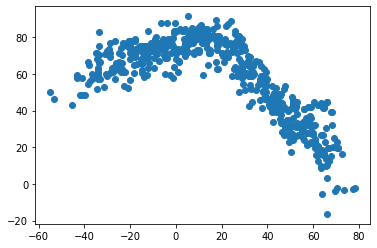

In [8]:
plt.scatter(lat_list, max_temp_list)
plt.show()

## Latitude vs. Humidity Plot

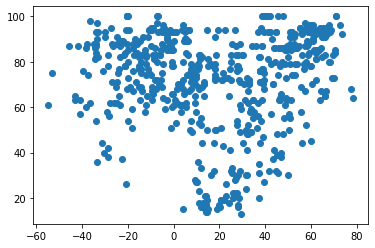

In [9]:
plt.scatter(lat_list, humidity_list)
plt.show()

## Latitude vs. Cloudiness Plot

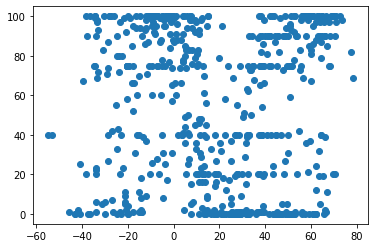

In [10]:
plt.scatter(lat_list, cloud_list)
plt.show()

## Latitude vs. Wind Speed Plot

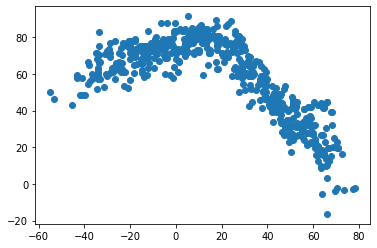

In [11]:
plt.scatter(lat_list, max_temp_list)
plt.show()

# Linear Regression

In [12]:
north_hem_df = city_data_df.loc[city_data_df["Lat"] > 0,:]
south_hem_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

display(north_hem_df.head())
display(south_hem_df.head())

def plot_linreg (x_axis, y_axis, scatter_color, line_color):
    x_label = input("Enter x axis title (press Enter if unlabeled): ")
    y_label = input("Enter y axis title (press Enter if unlabeled): ")
    title = input("Enter plot title (press Enter if unlabeled): ")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    plt.scatter(x_axis, y_axis, c = scatter_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    line_values = slope * x_axis + intercept
    plt.plot(x_axis, line_values, color = line_color)
    plt.text(max(x_axis) * 2/3, min(y_axis), f"y = {round(slope,2)}x + {round(intercept,2)} \nR-value = {round(rvalue,2)}", color = line_color)
    print(f"r-squared value is: {rvalue**2}")
    #plt.text(s = f"y = {round(slope,2)}x + {round(intercept,2)} \nR-value = {round(rvalue,2)}", color = line_color)
    
    return plt.show()

,City,Cloudiness,Contry,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
6,Hopkinsville,20,US,1585625657,62,36.87,-87.49,57.20,3.36
7,Nālūt,49,LY,1585625657,44,30.33,10.85,51.44,9.44
8,Qaanaaq,82,GL,1585625661,68,77.48,-69.36,-3.03,4.09
9,George Town,20,MY,1585625661,62,5.41,100.34,91.40,4.70
12,San-Pédro,49,CI,1585625662,89,4.75,-6.64,79.47,6.93


,City,Cloudiness,Contry,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mar del Plata,90,AR,1585625566,88,-38.00,-57.56,64.99,13.87
1,Busselton,97,AU,1585625656,36,-33.65,115.33,75.00,4.45
2,Ushuaia,40,AR,1585625445,61,-54.80,-68.30,50.00,19.46
3,Taltal,55,CL,1585625656,69,-25.40,-70.48,65.97,0.94
4,Port Alfred,69,ZA,1585625656,97,-33.59,26.89,66.00,4.00


## Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Max Temp (°F)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.8363206297289771


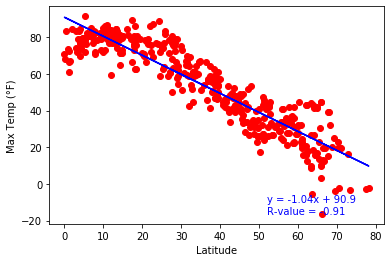

In [13]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Max Temp"], "red", "blue")

## Southern Hemisphere - Max Temp vs. Latitude Linear Regeression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Max Temp (°F)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.38926639761236276


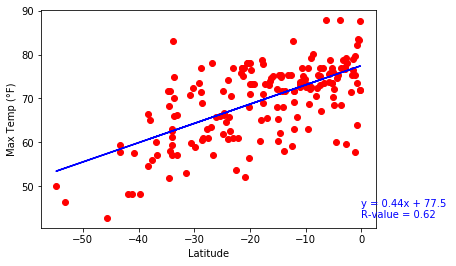

In [14]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Max Temp"], "red", "blue")

## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Humidity (%)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.13953077033999398


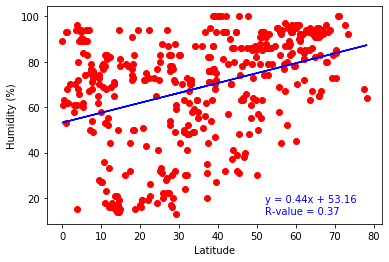

In [15]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Humidity"], "red", "blue")

## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Humidity (%)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.03014116261752504


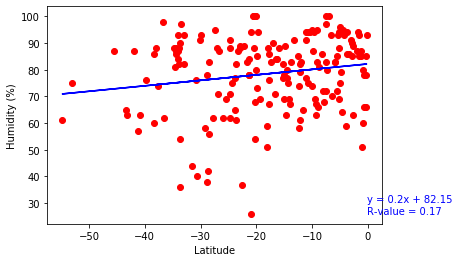

In [16]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Humidity"], "red", "blue")

## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Cloudiness (%)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.03031328888043496


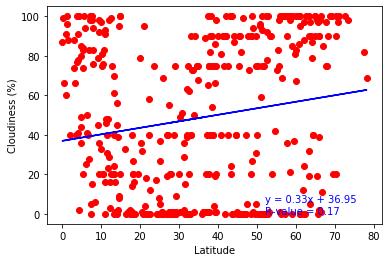

In [17]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Cloudiness"], "red", "blue")

## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Cloudiness (%)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.11876999234728955


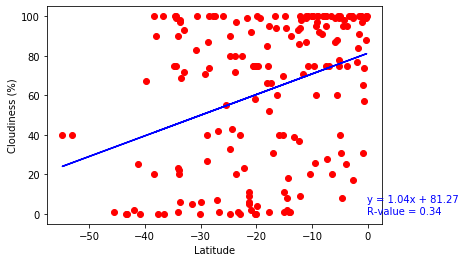

In [18]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Cloudiness"], "red", "blue")

## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Wind Speed (mph)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.10559111106012896


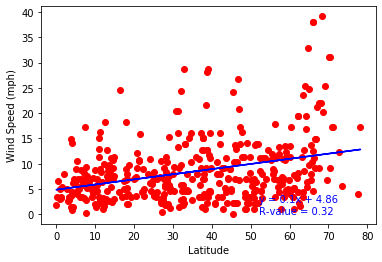

In [19]:
plot_linreg(north_hem_df["Lat"], north_hem_df["Wind Speed"], "red", "blue")

## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Enter x axis title (press Enter if unlabeled): Latitude
Enter y axis title (press Enter if unlabeled): Wind Speed (mph)
Enter plot title (press Enter if unlabeled): 
r-squared value is: 0.23507343091070143


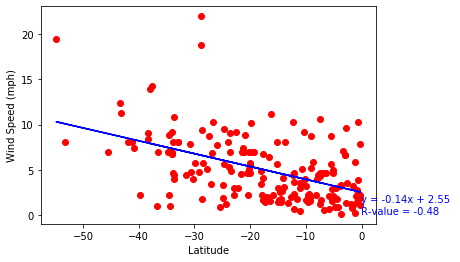

In [20]:
plot_linreg(south_hem_df["Lat"], south_hem_df["Wind Speed"], "red", "blue")